In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
startup = pd.read_csv("50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)
    Make a box and whisker plot.
    
    Make a box and whisker plot for each column of *x* or each
    vector in sequence *x*.  The box extends from the lower to
    upper quartile values of the data, with a line at the median.
    The whiskers extend from the box to show the range of the
    data.  Flier points are those past the end of the whiskers.
    
    Parameters
    ----------
    x : Array or a sequence of vectors.
        The input data.
    
    notch : bool, default: False
        Whether to draw a noteched box pl

{'whiskers': [<matplotlib.lines.Line2D at 0x1daa0365400>,
 'caps': [<matplotlib.lines.Line2D at 0x1daa0365ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1daa03650a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1daa03721c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1daa0372520>],
 'means': []}

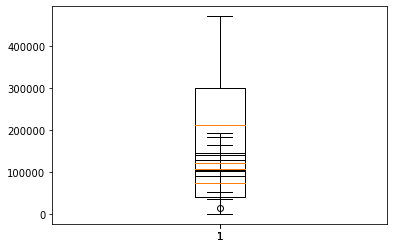

In [4]:
help(plt.boxplot)
plt.boxplot(startup["Profit"])
plt.boxplot(startup["R&D Spend"])
plt.boxplot(startup["Administration"])
plt.boxplot(startup["Marketing Spend"])

In [5]:
Startup= pd.get_dummies(startup['State'])

In [6]:
startup= pd.concat([startup,Startup],axis=1)

In [7]:
startup= startup.drop(["State"],axis=1)

In [8]:
startup= startup.iloc[:,[3,0,1,2,4,5,6]]

In [9]:
import seaborn as sn

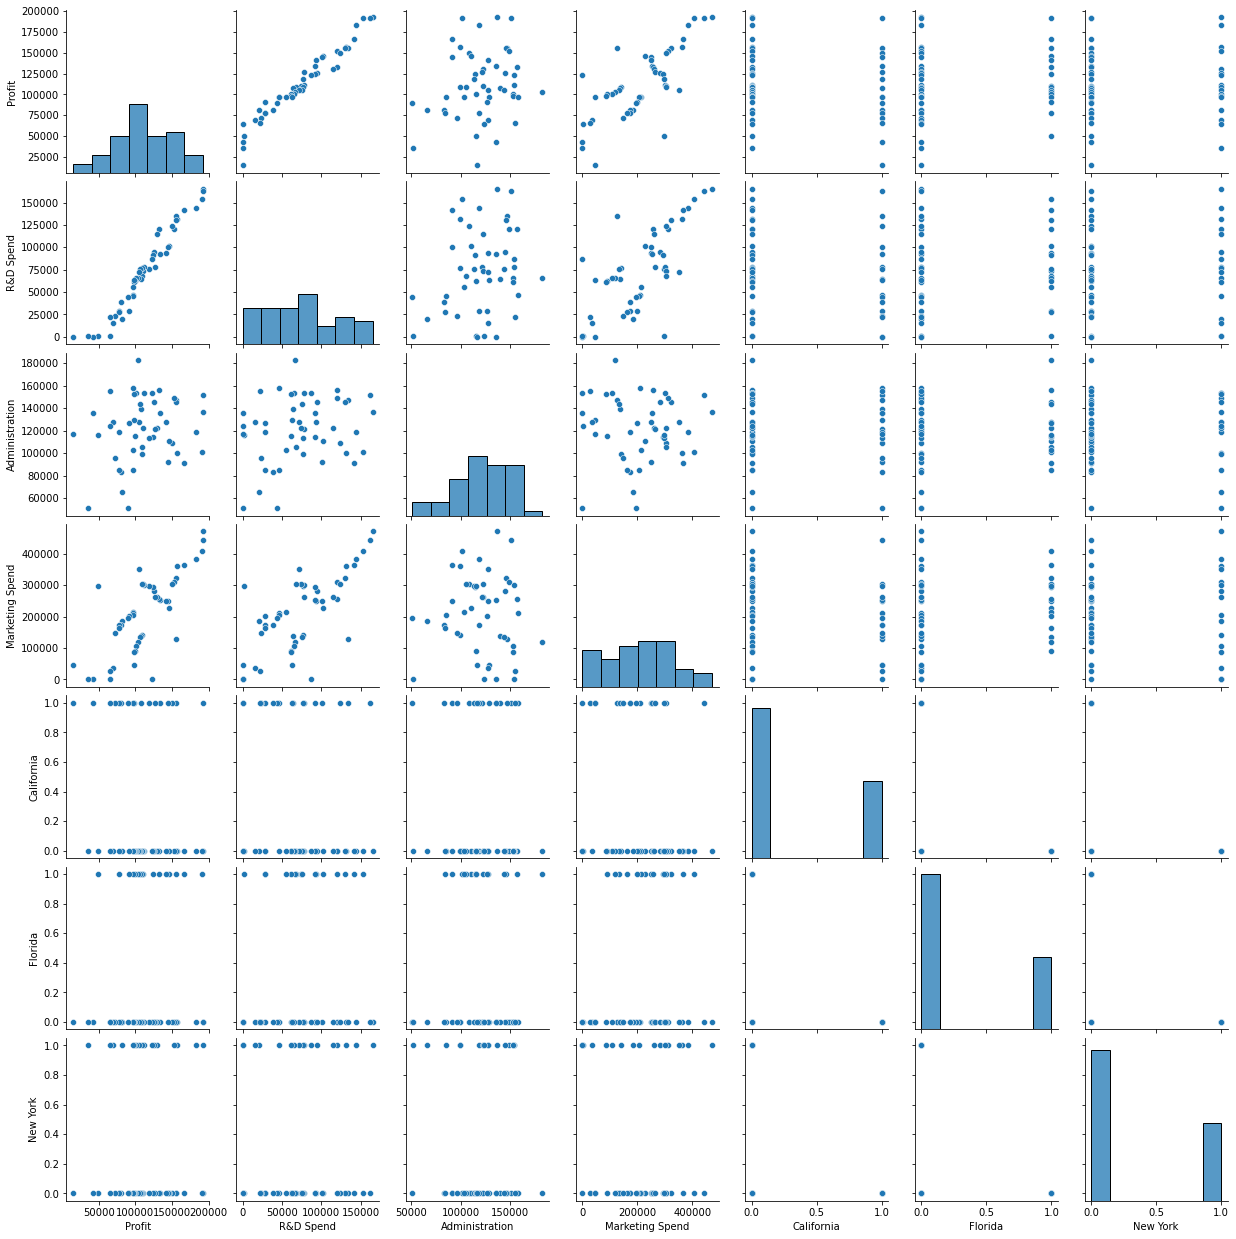

In [10]:
sn.pairplot(startup)
cor_values= startup.corr()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_data,test_data= train_test_split(startup)

In [13]:
import statsmodels.formula.api as smf
startup.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)
train_data.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)
test_data.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [14]:
train_data.to_csv("train_data.csv",encoding="utf-8")
test_data.to_csv("test_data.csv",encoding="utf-8")

In [15]:
model1= smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork",data=train_data).fit()
model1.summary() ##0.951
# Administration is insignificant
# building alone without any other input variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     136.4
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           3.77e-20
Time:                        23:30:41   Log-Likelihood:                -387.78
No. Observations:                  37   AIC:                             787.6
Df Residuals:                      31   BIC:                             797.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.401e+04   5902.844      5.761      0.000     2.2e+04     4.6e+04
RnD                0.8269      0.060     13.671      0.000       0.704       0.950
Administration     0.0130      0.061      0.213      0.832      -0.111       0.137
Marketing          0.0271      0.023      1.189      0.244      -0.019       0.074
California      9596.4937   2801.964      3.425      0.002    3881.851    1.53e+04
Florida         1.276e+04   3139.313      4.066      0.000    6360.506    1.92e+04
NewYork         1.165e+04   3061.686      3.805      0.001    5404.435    1.79e+04
==============================================================================
Omnibus:                       14.715   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.079
Skew:                          -1.077   Prob(JB):                     4.37e-05
Kurtosis:                       5.895   Cond. No.                     1.42e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
model1_ad= smf.ols("Profit~Administration", data= train_data).fit()
model1_ad.summary()
## alone also Administration is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7029
Date:                Fri, 04 Jun 2021   Prob (F-statistic):              0.408
Time:                        23:30:55   Log-Likelihood:                -445.42
No. Observations:                  37   AIC:                             894.8
Df Residuals:                      35   BIC:                             898.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8.615e+04   3.01e+04      2.862      0.007     2.5e+04    1.47e+05
Administration     0.2082      0.248      0.838      0.408      -0.296       0.712
==============================================================================
Omnibus:                        0.004   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.998   Jarque-Bera (JB):                0.125
Skew:                           0.022   Prob(JB):                        0.939
Kurtosis:                       2.718   Cond. No.                     5.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model1_ma = smf.ols("Profit~Marketing", data= train_data).fit()
model1_ma.summary()
## only marketing is significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     61.16
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           3.45e-09
Time:                        23:31:04   Log-Likelihood:                -427.09
No. Observations:                  37   AIC:                             858.2
Df Residuals:                      35   BIC:                             861.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.626e+04   8139.144      6.912      0.000    3.97e+04    7.28e+04
Marketing      0.2697      0.034      7.821      0.000       0.200       0.340
==============================================================================
Omnibus:                        4.266   Durbin-Watson:                   2.420
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.902
Skew:                           0.607   Prob(JB):                        0.234
Kurtosis:                       3.641   Cond. No.                     4.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model1_com= smf.ols("Profit~Administration+Marketing", data= train_data).fit()
model1_com.summary()
#both variables are significant, the intercept becomes insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     37.82
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.27e-09
Time:                        23:31:14   Log-Likelihood:                -424.13
No. Observations:                  37   AIC:                             854.3
Df Residuals:                      34   BIC:                             859.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.356e+04   1.91e+04      0.708      0.484   -2.54e+04    5.25e+04
Administration     0.3467      0.143      2.431      0.020       0.057       0.637
Marketing          0.2786      0.033      8.573      0.000       0.213       0.345
==============================================================================
Omnibus:                        1.796   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                0.931
Skew:                           0.352   Prob(JB):                        0.628
Kurtosis:                       3.330   Cond. No.                     1.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# plotting influence plot
import statsmodels.api as sm

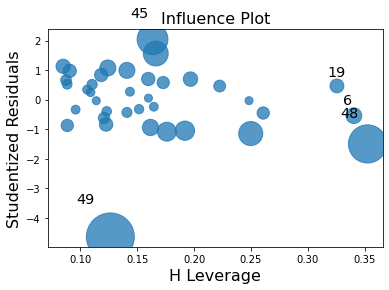

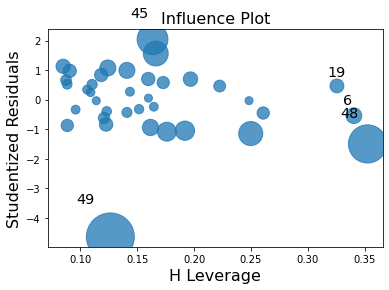

In [20]:
sm.graphics.influence_plot(model1)

In [21]:
train_data1= train_data.drop(train_data.index[[4]], axis=0)

In [22]:
model2= smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork", data= train_data1).fit()
model2.summary() #Both Marketing and Administration are insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     130.2
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.11e-19
Time:                        23:32:35   Log-Likelihood:                -377.11
No. Observations:                  36   AIC:                             766.2
Df Residuals:                      30   BIC:                             775.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.507e+04   5968.965      5.876      0.000    2.29e+04    4.73e+04
RnD                0.8427      0.062     13.576      0.000       0.716       0.969
Administration    -0.0017      0.062     -0.027      0.978      -0.129       0.126
Marketing          0.0246      0.023      1.080      0.289      -0.022       0.071
California      9685.4003   2795.719      3.464      0.002    3975.781    1.54e+04
Florida         1.366e+04   3238.838      4.217      0.000    7043.596    2.03e+04
NewYork         1.173e+04   3054.426      3.840      0.001    5490.375     1.8e+04
==============================================================================
Omnibus:                       13.839   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.193
Skew:                          -1.034   Prob(JB):                     0.000112
Kurtosis:                       5.802   Cond. No.                     3.55e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.01e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
train_data2 = train_data.drop(train_data.index[[4,24]],axis=0)
model3 = smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork", data= train_data2).fit()
model3.summary()administration is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     116.1
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.92e-18
Time:                        23:32:58   Log-Likelihood:                -367.09
No. Observations:                  35   AIC:                             746.2
Df Residuals:                      29   BIC:                             755.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.508e+04   6065.797      5.783      0.000    2.27e+04    4.75e+04
RnD                0.8410      0.064     13.235      0.000       0.711       0.971
Administration     0.0002      0.064      0.004      0.997      -0.130       0.131
Marketing          0.0243      0.023      1.045      0.305      -0.023       0.072
California      9785.6898   2875.889      3.403      0.002    3903.836    1.57e+04
Florida         1.363e+04   3293.166      4.140      0.000    6898.294    2.04e+04
NewYork         1.166e+04   3119.190      3.738      0.001    5279.667     1.8e+04
==============================================================================
Omnibus:                       14.105   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.335
Skew:                          -1.074   Prob(JB):                     0.000104
Kurtosis:                       5.821   Cond. No.                     2.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.14e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
#looking into VIF plot to check if there is any dependency among input variables

In [27]:
rsq_rnd = smf.ols("RnD~Administration+Marketing+California+Florida+NewYork", data= train_data2).fit().rsquared
ViF_rnd = 1/(1-rsq_rnd)
print(1/(1-rsq_rnd))

2.9312897711819765


In [28]:
rsq_adm = smf.ols("Administration~RnD+Marketing+California+Florida+NewYork", data=train_data2).fit().rsquared
ViF_adm = 1/(1-rsq_adm)
print(1/(1-rsq_adm))

1.2421116842720048


In [29]:
rsq_mar = smf.ols("Marketing ~ RnD+Administration+California+Florida+NewYork", data= train_data2).fit().rsquared
ViF_mar = 1/(1-rsq_mar)
print(1/(1-rsq_mar))

2.87971612249831


In [30]:
# all VIF values are below  10 so there is no dependency among input variables

In [31]:
# checking for AV plot

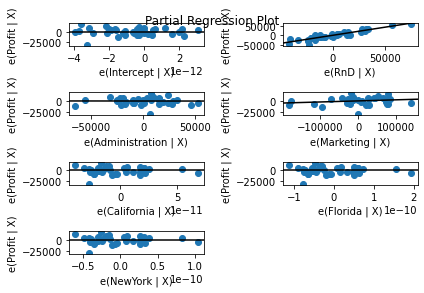

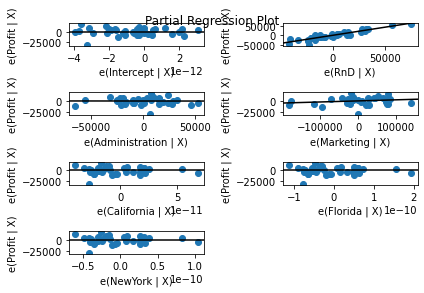

In [32]:
sm.graphics.plot_partregress_grid(model2)
## as the correlation value between Profit and Administration is low and the AV plot also shows the same.lets remove Administration variable


In [33]:
model3= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data = train_data2).fit()
model3.summary() ## all the variables are signifiacnt

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     150.1
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.22e-19
Time:                        23:36:07   Log-Likelihood:                -367.09
No. Observations:                  35   AIC:                             744.2
Df Residuals:                      30   BIC:                             752.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.51e+04   2470.557     14.207      0.000    3.01e+04    4.01e+04
RnD            0.8411      0.056     14.952      0.000       0.726       0.956
Marketing      0.0243      0.021      1.143      0.262      -0.019       0.068
California  9792.2205   2263.859      4.325      0.000    5168.804    1.44e+04
Florida     1.364e+04   2602.366      5.242      0.000    8326.259     1.9e+04
NewYork     1.167e+04   2477.482      4.709      0.000    6606.403    1.67e+04
==============================================================================
Omnibus:                       14.101   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.325
Skew:                          -1.074   Prob(JB):                     0.000105
Kurtosis:                       5.821   Cond. No.                     2.18e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.49e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
#Final Model
finalmodel= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data = train_data2).fit()
finalmodel.summary()##  0.967 (final model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     150.1
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.22e-19
Time:                        23:36:34   Log-Likelihood:                -367.09
No. Observations:                  35   AIC:                             744.2
Df Residuals:                      30   BIC:                             752.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.51e+04   2470.557     14.207      0.000    3.01e+04    4.01e+04
RnD            0.8411      0.056     14.952      0.000       0.726       0.956
Marketing      0.0243      0.021      1.143      0.262      -0.019       0.068
California  9792.2205   2263.859      4.325      0.000    5168.804    1.44e+04
Florida     1.364e+04   2602.366      5.242      0.000    8326.259     1.9e+04
NewYork     1.167e+04   2477.482      4.709      0.000    6606.403    1.67e+04
==============================================================================
Omnibus:                       14.101   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.325
Skew:                          -1.074   Prob(JB):                     0.000105
Kurtosis:                       5.821   Cond. No.                     2.18e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.49e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
#training data prediction
train_pred = finalmodel.predict(train_data2)

In [37]:
# training residual
train_res= train_data2["Profit"]-train_pred

In [38]:
# train rmse
train_rmse = np.sqrt(np.mean(train_res*train_res))

In [39]:
# test data prediction
test_pred = finalmodel.predict(test_data)

In [40]:
#test residuals
test_res= test_data["Profit"]- test_pred

In [41]:
#test rmse
test_rmse = np.sqrt(np.mean(test_res*test_res))

In [42]:
# as the data is very less to properly train the model,there is difference in test rmse and train rmse

In [43]:
# training the model with the whole data set

In [44]:
startup1= startup.drop(startup.index[[4,24]],axis=0)
bestmodel= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data =startup1).fit()
bestmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     200.4
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           3.35e-27
Time:                        23:38:12   Log-Likelihood:                -505.22
No. Observations:                  48   AIC:                             1020.
Df Residuals:                      43   BIC:                             1030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.525e+04   2158.528     16.332      0.000    3.09e+04    3.96e+04
RnD            0.8017      0.044     18.327      0.000       0.713       0.890
Marketing      0.0290      0.017      1.750      0.087      -0.004       0.062
California  1.153e+04   1959.390      5.886      0.000    7581.153    1.55e+04
Florida     1.199e+04   2231.189      5.376      0.000    7495.179    1.65e+04
NewYork     1.172e+04   2091.061      5.607      0.000    7507.870    1.59e+04
==============================================================================
Omnibus:                       14.156   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.900
Skew:                          -0.965   Prob(JB):                     7.87e-05
Kurtosis:                       5.392   Cond. No.                     1.19e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
bestmodel_pred = bestmodel.predict(startup1)#validation

Text(0, 0.5, 'Fitted values')

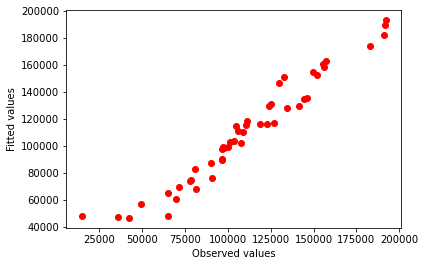

In [46]:
#Linearty #Observed values v/s Fitted values
plt.scatter(startup1.Profit,bestmodel_pred,c='r');plt.xlabel("Observed values");plt.ylabel("Fitted values")

Text(0, 0.5, 'Residuals')

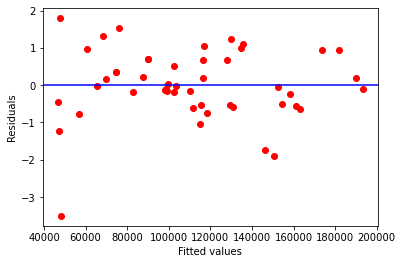

In [47]:
#Residuals v/s Fitted values
plt.scatter(bestmodel_pred,bestmodel.resid_pearson, c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")

(array([ 1.,  0.,  0.,  2.,  2., 10., 15.,  8.,  7.,  3.]),
 array([-3.50866306, -2.97830915, -2.44795525, -1.91760135, -1.38724745,
        -0.85689354, -0.32653964,  0.20381426,  0.73416816,  1.26452207,
         1.79487597]),
 <BarContainer object of 10 artists>)

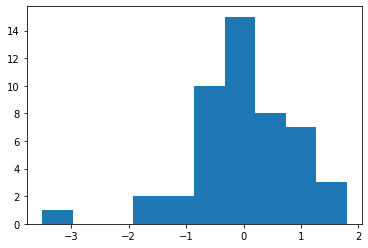

In [48]:
#Normality plot for residuals
##histogram
plt.hist(bestmodel.resid_pearson)

In [49]:
#QQplot
import pylab
import scipy.stats as st

((array([-2.18794508, -1.81466696, -1.5940389 , -1.43152593, -1.29991017,
         -1.18761792, -1.08858668, -0.99921942, -0.91719469, -0.84091983,
         -0.76924975, -0.7013297 , -0.63650166, -0.57424545, -0.51414026,
         -0.45583845, -0.39904728, -0.34351563, -0.28902427, -0.23537844,
         -0.18240202, -0.12993297, -0.07781945, -0.02591656,  0.02591656,
          0.07781945,  0.12993297,  0.18240202,  0.23537844,  0.28902427,
          0.34351563,  0.39904728,  0.45583845,  0.51414026,  0.57424545,
          0.63650166,  0.7013297 ,  0.76924975,  0.84091983,  0.91719469,
          0.99921942,  1.08858668,  1.18761792,  1.29991017,  1.43152593,
          1.5940389 ,  1.81466696,  2.18794508]),
  array([-3.50866306, -1.91417586, -1.72759685, -1.23268811, -1.05039156,
         -0.77854107, -0.75465648, -0.65273938, -0.6074688 , -0.59579298,
         -0.55969506, -0.53273591, -0.52478929, -0.49680024, -0.44370809,
         -0.23933784, -0.18459717, -0.17530937, -0.16016657, -

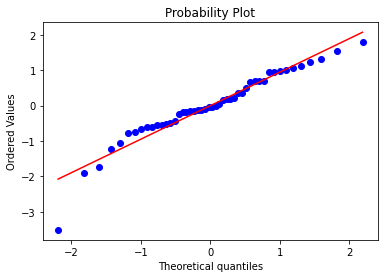

In [50]:
st.probplot(bestmodel.resid_pearson, dist='norm', plot=pylab)

Text(0, 0.5, 'Residuals')

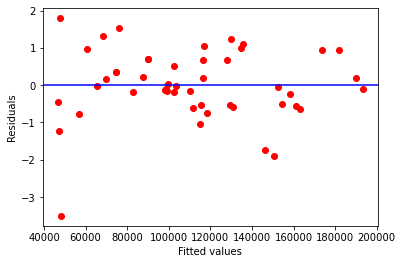

In [51]:
#Homoscadasticity
plt.scatter(bestmodel_pred,bestmodel.resid_pearson,c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")